https://www.kaggle.com/c/santander-customer-satisfaction

0 : satisfaction / 1 : unsatifaction

In [1]:
import os
os.listdir('../MLguide/data/santander_cs')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../MLguide/data/santander_cs/train.csv')
test = pd.read_csv('../MLguide/data/santander_cs/test.csv')
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (76020, 371)
test shape :  (75818, 370)


In [2]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
#0 NA
train.isnull().sum().sum()

0

In [4]:
train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [5]:
sum(train.TARGET == 1)

3008

In [6]:
print('unsatisfied rate {0:.4f}%'.format(sum(train.TARGET == 1) / len(train)))

unsatisfied rate 0.0396%


In [7]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# preprocessing

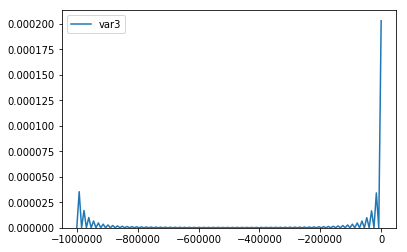

In [8]:
import seaborn as sns
sns.kdeplot(train.var3)

In [9]:
train.var3.value_counts().sort_values(ascending = False).head(3)

 2         74165
 8           138
-999999      116
Name: var3, dtype: int64

In [10]:
#제일 많은 2로 채울 것
train.var3.replace(-999999, 2, inplace = True)
# drop id column
train.drop('ID', axis = 1, inplace = True)

# train_test_split

In [11]:
X_features = train.iloc[:, :-1]
y_labels = train.TARGET

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = train_test_split(X_features, y_labels,
                                                   test_size = 0.2, random_state = 0)

print('train dataset shape : ', X_train.shape, 'test dataset shape : ', X_test.shape)

print('train set label rate')
print(y_train.value_counts() / len(X_train))
print('test set label rate')
print(y_test.value_counts() / len(X_test))

train dataset shape :  (60816, 369) test dataset shape :  (15204, 369)
train set label rate
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
test set label rate
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


# XGBoost

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [14]:
xgb = XGBClassifier(n_estimators = 500, random_state=156, verbose_eval = 50, n_jobs=-1)

xgb.fit(X_train ,y_train, early_stopping_rounds = 100,verbose=50,
       eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.843695	validation_1-auc:0.836634
[100]	validation_0-auc:0.856386	validation_1-auc:0.841469
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[200]	validation_0-auc:0.868041	validation_1-auc:0.841281
[250]	validation_0-auc:0.872945	validation_1-auc:0.841375
Stopping. Best iteration:
[178]	validation_0-auc:0.866004	validation_1-auc:0.841863



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=156, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose_eval=50)

In [15]:
xgb_roc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc))

ROC AUC : 0.8419


## tuning

In [19]:
from sklearn.model_selection import GridSearchCV

#속도를 향상시키기 위해 n_estimators = 100으로 감소
xgb = XGBClassifier(n_estimators=100, n_jobs = -1, verbose_eval = 10)

params = {
    'max_depth' : [5,7],
    'min_child_weight' : [1,3],
    'colsample_bytree' : [0.5,0.75]
}

gridcv = GridSearchCV(xgb, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
                     eval_set = [(X_train, y_train), (X_test, y_test)], verbose=10)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.803125	validation_1-auc:0.802563
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[10]	validation_0-auc:0.828564	validation_1-auc:0.826696
[20]	validation_0-auc:0.832219	validation_1-auc:0.828685
[30]	validation_0-auc:0.845439	validation_1-auc:0.836425
[40]	validation_0-auc:0.855712	validation_1-auc:0.840052
[50]	validation_0-auc:0.861729	validation_1-auc:0.841523
[60]	validation_0-auc:0.864934	validation_1-auc:0.840377
[70]	validation_0-auc:0.867429	validation_1-auc:0.839308
Stopping. Best iteration:
[48]	validation_0-auc:0.861296	validation_1-auc:0.841947

[0]	validation_0-auc:0.805518	validation_1-auc:0.800757
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[10]	validation_0-auc:0.831981	validation_1-auc:0.829478
[20]	validation_0-auc:0.838181	val

[0]	validation_0-auc:0.815595	validation_1-auc:0.809669
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[10]	validation_0-auc:0.844112	validation_1-auc:0.829166
[20]	validation_0-auc:0.850348	validation_1-auc:0.830571
[30]	validation_0-auc:0.861193	validation_1-auc:0.835582
[40]	validation_0-auc:0.872038	validation_1-auc:0.840891
[50]	validation_0-auc:0.877319	validation_1-auc:0.841736
[60]	validation_0-auc:0.880808	validation_1-auc:0.841344
[70]	validation_0-auc:0.883415	validation_1-auc:0.841402
[80]	validation_0-auc:0.886227	validation_1-auc:0.840797
Stopping. Best iteration:
[52]	validation_0-auc:0.877956	validation_1-auc:0.842526

[0]	validation_0-auc:0.801516	validation_1-auc:0.805217
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[10]	validation_0-auc:0.833978	val

[50]	validation_0-auc:0.879717	validation_1-auc:0.843911
[60]	validation_0-auc:0.881882	validation_1-auc:0.842583
[70]	validation_0-auc:0.883715	validation_1-auc:0.842291
[80]	validation_0-auc:0.885802	validation_1-auc:0.842277
Stopping. Best iteration:
[51]	validation_0-auc:0.879879	validation_1-auc:0.843926

[0]	validation_0-auc:0.815566	validation_1-auc:0.809454
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[10]	validation_0-auc:0.847828	validation_1-auc:0.832875
[20]	validation_0-auc:0.860748	validation_1-auc:0.836907
[30]	validation_0-auc:0.869167	validation_1-auc:0.839324
[40]	validation_0-auc:0.874889	validation_1-auc:0.840621
[50]	validation_0-auc:0.879987	validation_1-auc:0.84283
[60]	validation_0-auc:0.882967	validation_1-auc:0.843002
[70]	validation_0-auc:0.885758	validation_1-auc:0.842685
[80]	validation_0-auc:0.887776	validation_1-auc:0.842893
Stopping. Best itera

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose_eval=10),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7], 'min_child_weight': [1, 3], 'colsample_bytree': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
print('GridSearchCV best parameter : ', gridcv.best_params_)

GridSearchCV best parameter :  {'max_depth': 5, 'min_child_weight': 1, 'colsample_bytree': 0.75}


In [21]:
xgb_roc = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc))

ROC AUC : 0.8438


In [23]:
xgb = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth = 5,
                   min_child_weight=1, colsample_bytree=0.75, reg_alpha = 0.03, n_jobs = -1)

xgb.fit(X_train ,y_train ,early_stopping_rounds = 200,
       eval_metric = 'auc', eval_set = [(X_train ,y_train), (X_test, y_test)], verbose = 50)

[0]	validation_0-auc:0.743236	validation_1-auc:0.744766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[50]	validation_0-auc:0.841878	validation_1-auc:0.834842
[100]	validation_0-auc:0.850387	validation_1-auc:0.839039
[150]	validation_0-auc:0.856689	validation_1-auc:0.842127
[200]	validation_0-auc:0.863778	validation_1-auc:0.84425
[250]	validation_0-auc:0.869211	validation_1-auc:0.844308
[300]	validation_0-auc:0.873922	validation_1-auc:0.844066
[350]	validation_0-auc:0.877941	validation_1-auc:0.84414
[400]	validation_0-auc:0.881213	validation_1-auc:0.844033
Stopping. Best iteration:
[226]	validation_0-auc:0.866647	validation_1-auc:0.844694



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.02,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=156, reg_alpha=0.03,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

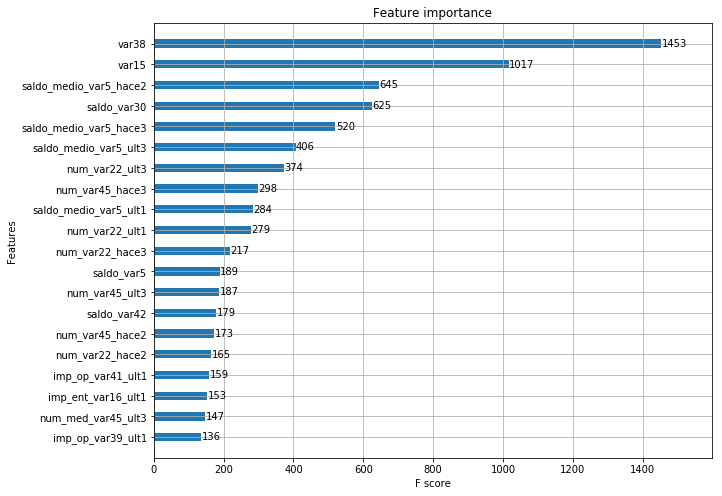

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize = (10,8))
plot_importance(xgb, ax = ax, max_num_features=20, height = 0.4)

## submission

In [41]:
xgb_sub = test[['ID']]
xgb_sub['TARGET'] = xgb.predict(test.drop('ID', axis = 1))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
#xgb_sub.to_csv('190326_xgb.csv', index = False)

# LightGBM

In [25]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators = 500)
evals = [(X_test, y_test)]

lgb.fit(X_train ,y_train ,early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
       verbose = 50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.139537	valid_0's auc: 0.838737
[100]	valid_0's binary_logloss: 0.140095	valid_0's auc: 0.837229
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.139408	valid_0's auc: 0.839599


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
lgb_roc = roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgb_roc))

ROC AUC : 0.8396


## tuning

In [29]:
lgb = LGBMClassifier(n_estimators=200, n_jobs=-1)

params = {
    'num_leaves' : [32, 64],
    'max_depth' : [128,160],
    'min_child_samples' : [60,100],
    'subsample' : [0.8,1]
}

gridcv = GridSearchCV(lgb, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', verbose = 50,
          eval_set = [(X_train ,y_train), (X_test, y_test)])

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.135274	valid_0's auc: 0.850276	valid_1's binary_logloss: 0.145043	valid_1's auc: 0.840042
Training until validation scores don't improve for 30 rounds.
[50]	valid_0's binary_logloss: 0.119734	valid_0's auc: 0.885759	valid_1's binary_logloss: 0.139727	valid_1's auc: 0.838029
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.124271	valid_0's auc: 0.87422	valid_1's binary_logloss: 0.139581	valid_1's auc: 0.839436
Training until validation scores don't improve for 30 rounds.
[50]	valid_0's binary_logloss: 0.120013	valid_0's auc: 0.885102	valid_1's binary_logloss: 0.13936	valid_1's auc: 0.839807
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.126047	valid_0's auc: 0.869485	valid_1's binary_logloss: 0.139735	valid_1's auc: 0.840676
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:


Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.128333	valid_0's auc: 0.870662	valid_1's binary_logloss: 0.142696	valid_1's auc: 0.837981
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.137695	valid_0's auc: 0.857012	valid_1's binary_logloss: 0.14943	valid_1's auc: 0.834623
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.126262	valid_0's auc: 0.874543	valid_1's binary_logloss: 0.141291	valid_1's auc: 0.837921
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.128333	valid_0's auc: 0.870662	valid_1's binary_logloss: 0.142696	valid_1's auc: 0.837981
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[9]	valid_0's binary_logl

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [128, 160], 'min_child_samples': [60, 100], 'num_leaves': [32, 64], 'subsample': [0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print('GridSearchCV best parameters : ', gridcv.best_params_)
lgb_roc = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : ', lgb_roc)

GridSearchCV best parameters :  {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC :  0.8441711827379625


In [45]:
lgb = LGBMClassifier(n_estimators=1000, num_leaves = 32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals,
       verbose = 50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.138309	valid_0's auc: 0.842965
[100]	valid_0's binary_logloss: 0.139137	valid_0's auc: 0.839472
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.139253	valid_0's auc: 0.844171


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=128,
        min_child_samples=100, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [47]:
lgb_roc = roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : ', lgb_roc)

ROC AUC :  0.8441711827379625


In [51]:
lgb_sub = test[['ID']]
lgb_sub['TARGET'] = lgb.predict(test.drop('ID', axis = 1))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
lgb_sub.to_csv('190326_lgb.csv', index = False)